<a href="https://colab.research.google.com/github/gcivitate/Python/blob/main/estat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados Estatísticos e Limpeza de Dados**





- IMPORTANDO BIBLIOTECAS PARA ANÁLISE

In [ ]:
#instalado o pacote atualizado do seaborn
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 8.7 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import csv
from pandas.core.groupby import NamedAgg
from scipy import stats as st
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

- IMPORTANTO ARQUIVO CSV

In [ ]:
dados_2019 = pd.read_csv('vendas_linha_petshop_2019.csv', sep = ";", decimal = ",", encoding = "ISO-8859-1")
dados_2020 = pd.read_csv('vendas_linha_petshop_2020.csv', sep = ";", decimal = ",", encoding = "ISO-8859-1")
dados_2021 = pd.read_csv('vendas_linha_petshop_2021.csv', sep = ";", decimal = ",", encoding = "ISO-8859-1")
dados_2022 = pd.read_csv('vendas_linha_petshop_2022.csv', sep = ";", decimal = ",", encoding = "ISO-8859-1")

- LENDO OS ARQUIVOS

In [ ]:
dados_2019.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22,2.0,44,13/06/2019,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentação
1,2,Norte,Biscoito True Champion 300g,21,2.0,42,03/01/2019,Amapá,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentação
2,3,Norte,Biscoito True Champion 300g,22,NaN,44,18/01/2019,Pará,Boleto Bancário,Rapid Pink,Julia,0.88,35.2,Alimentação
3,4,Norte,Biscoito True Champion 300g,19,4.0,88,19/08/2019,Rondônia,Boleto Bancário,Rapid Pink,Yuri,0.76,30.4,Alimentação
4,5,Norte,Biscoito True Champion 300g,22,2.0,44,18/10/2019,Tocantins,Cartão Crédito,Rapid Pink,Dolores,0.44,17.6,Alimentação


In [ ]:
dados_2020.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,50284,Norte,Biscoito True Champion 300g,24.64,2,49.28,12/03/2020,Acre,Cartão Crédito,Rapid Pink,Carlos,1.76,26.4,Alimentação
1,50285,Norte,Biscoito True Champion 300g,23.52,2,47.04,10/04/2020,Amapá,Cartão Crédito,Rapid Pink,Maria Linda,1.68,25.2,Alimentação
2,50286,Norte,Biscoito True Champion 300g,24.64,4,98.56,07/08/2020,Pará,Dinheiro,Rapid Pink,Julia,3.52,52.8,Alimentação
3,50287,Norte,Biscoito True Champion 300g,21.28,4,85.12,10/01/2020,Rondônia,Pix,Rapid Pink,Yuri,3.04,45.6,Alimentação
4,50288,Norte,Biscoito True Champion 300g,24.64,,49.28,11/04/2020,Tocantins,Cartão Crédito,Rapid Pink,Dolores,1.76,26.4,Alimentação


In [ ]:
dados_2021.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,100567,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,1020.11,1,1020.11,02/11/2021,Ceará,Cartão Crédito,Gold Beach,Neide,53.69,230.1,Bebedouros e Comedouros
1,100568,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,1135.82,1,1135.82,19/12/2021,Maranhão,Cartão Crédito,Gold Beach,Clarice,59.78,256.2,Bebedouros e Comedouros
2,100569,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,1054.69,1,1054.69,16/09/2021,Paraíba,Boleto Bancário,Gold Beach,Cristina,55.51,237.9,Bebedouros e Comedouros
3,100570,Nordeste,Nutri Alimentador Inteligente Automático Câmer...,1167.74,1,1167.74,18/01/2021,Pernambuco,Pix,Gold Beach,Claudio,61.46,263.4,Bebedouros e Comedouros
4,100571,Sudeste,Nutri Alimentador Inteligente Automático Câmer...,1173.06,1,1173.06,27/11/2021,Piauí,Dinheiro,Gold Beach,Cristian,61.74,264.6,Bebedouros e Comedouros


In [ ]:
dados_2022.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,150581,Norte,Biscoito True Champion 300g,35.64,22.0,784.08,01/03/2022,Acre,Pix,Rapid Pink,Carlos,4.84,193.6,Alimentação
1,150582,Norte,Biscoito True Champion 300g,34.02,2.0,68.04,19/02/2022,Amapá,Boleto Bancário,Rapid Pink,Maria Linda,0.42,16.8,Alimentação
2,150583,Norte,Biscoito True Champion 300g,35.64,4.0,142.56,19/02/2022,Pará,Boleto Bancário,Rapid Pink,Julia,0.88,35.2,Alimentação
3,150584,Norte,Biscoito True Champion 300g,30.78,4.0,123.12,22/02/2022,Rondônia,Dinheiro,Rapid Pink,Yuri,0.76,30.4,Alimentação
4,150585,Norte,Biscoito True Champion 300g,35.64,2.0,71.28,18/03/2022,Tocantins,Dinheiro,Rapid Pink,Dolores,0.44,17.6,Alimentação


- TRATANDO OS DADOS

-- Verificando tipo de dado



In [ ]:
dados_2019.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                    int64
quantidade             float64
valor_total_bruto        int64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

In [ ]:
dados_2020.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                  float64
quantidade              object
valor_total_bruto      float64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

In [ ]:
dados_2021.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                  float64
quantidade              object
valor_total_bruto      float64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

In [ ]:
dados_2022.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                  float64
quantidade             float64
valor_total_bruto      float64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

-- Convertendo a coluna quantidade das tabelas 2020 e 2021 de OBJECT para FLOAT64

In [ ]:
dados_2020['quantidade'] = dados_2020.quantidade.replace(" ",np.nan).astype(float)

In [ ]:
dados_2021['quantidade'] = dados_2020.quantidade.replace(" ",np.nan).astype(float)

-- DADOS MISSING

In [ ]:
#Resumo Estatístico 2019
dados_2019.describe()

,cod_pedido,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido
count,50283.00000,50283.000000,50128.000000,50283.000000,50283.000000,50283.000000
mean,25142.00000,87.633872,4.310984,421.428813,17.065437,165.814479
std,14515.59613,166.373164,15.235159,5156.138055,208.122821,1100.728959
min,1.00000,5.000000,1.000000,0.000000,0.100000,1.500000
25%,12571.50000,22.000000,1.000000,30.000000,0.640000,16.500000
50%,25142.00000,33.000000,1.000000,56.000000,1.350000,25.600000
75%,37712.50000,65.000000,2.000000,95.000000,3.780000,54.400000
max,50283.00000,890.000000,110.000000,456546.000000,6837.600000,29304.000000


In [ ]:
#Resumo de valores não nulos encontrados 2019
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50283 entries, 0 to 50282
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_pedido           50283 non-null  int64  
 1   regiao_pais          50283 non-null  object 
 2   produto              50283 non-null  object 
 3   valor                50283 non-null  int64  
 4   quantidade           50128 non-null  float64
 5   valor_total_bruto    50283 non-null  int64  
 6   data                 50283 non-null  object 
 7   estado               50283 non-null  object 
 8   formapagto           50283 non-null  object 
 9   centro_distribuicao  50283 non-null  object 
 10  responsavelpedido    50283 non-null  object 
 11  valor_comissao       50283 non-null  float64
 12  lucro_liquido        50283 non-null  float64
 13  categoriaprod        50283 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 5.4+ MB


In [ ]:
#Somar os valores nulos encontrados 2019
dados_2019.isnull().sum()

cod_pedido               0
regiao_pais              0
produto                  0
valor                    0
quantidade             155
valor_total_bruto        0
data                     0
estado                   0
formapagto               0
centro_distribuicao      0
responsavelpedido        0
valor_comissao           0
lucro_liquido            0
categoriaprod            0
dtype: int64

In [ ]:
#Resumo Estatístico 2020
dados_2020.describe()

,cod_pedido,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido
count,50089.000000,50089.000000,49943.000000,50089.000000,50089.000000,50089.000000
mean,75328.000000,97.998111,3.693591,326.084395,12.256320,132.042494
std,14459.593154,185.957288,11.386617,2221.875308,124.953948,716.723693
min,50284.000000,5.600000,1.000000,0.000000,0.120000,1.500000
25%,62806.000000,24.640000,1.000000,33.600000,0.660000,16.500000
50%,75328.000000,36.960000,1.000000,62.720000,1.350000,25.300000
75%,87850.000000,72.800000,2.000000,107.520000,3.800000,54.400000
max,100372.000000,996.800000,74.000000,72602.880000,4333.280000,18812.100000


In [ ]:
#Resumo de valores não nulos encontrados 2020
dados_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50089 entries, 0 to 50088
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_pedido           50089 non-null  int64  
 1   regiao_pais          50089 non-null  object 
 2   produto              50089 non-null  object 
 3   valor                50089 non-null  float64
 4   quantidade           49943 non-null  float64
 5   valor_total_bruto    50089 non-null  float64
 6   data                 50089 non-null  object 
 7   estado               50089 non-null  object 
 8   formapagto           50089 non-null  object 
 9   centro_distribuicao  50089 non-null  object 
 10  responsavelpedido    50089 non-null  object 
 11  valor_comissao       50089 non-null  float64
 12  lucro_liquido        50089 non-null  float64
 13  categoriaprod        50089 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 5.4+ MB


In [ ]:
#Somar os valores nulos encontrados 2020
dados_2020.isnull().sum()

cod_pedido               0
regiao_pais              0
produto                  0
valor                    0
quantidade             146
valor_total_bruto        0
data                     0
estado                   0
formapagto               0
centro_distribuicao      0
responsavelpedido        0
valor_comissao           0
lucro_liquido            0
categoriaprod            0
dtype: int64

In [ ]:
#Resumo Estatístico 2021
dados_2021.describe()

,cod_pedido,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido
count,50014.000000,50014.000000,49868.000000,50014.000000,50014.000000,50014.000000
mean,125573.500000,116.756603,3.692368,465.279032,15.290047,149.899785
std,14437.942518,221.432522,11.382562,4007.791478,179.751226,953.111064
min,100567.000000,6.650000,1.000000,0.000000,0.120000,1.500000
25%,113070.250000,29.260000,1.000000,39.900000,0.660000,16.800000
50%,125573.500000,43.890000,1.000000,77.140000,1.380000,25.600000
75%,138076.750000,86.450000,2.000000,130.340000,3.960000,55.500000
max,150580.000000,1183.700000,74.000000,345345.000000,5482.400000,23496.000000


In [ ]:
#Resumo de valores não nulos encontrados 2021
dados_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50014 entries, 0 to 50013
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_pedido           50014 non-null  int64  
 1   regiao_pais          50014 non-null  object 
 2   produto              50014 non-null  object 
 3   valor                50014 non-null  float64
 4   quantidade           49868 non-null  float64
 5   valor_total_bruto    50014 non-null  float64
 6   data                 50014 non-null  object 
 7   estado               50014 non-null  object 
 8   formapagto           50014 non-null  object 
 9   centro_distribuicao  50014 non-null  object 
 10  responsavelpedido    50014 non-null  object 
 11  valor_comissao       50014 non-null  float64
 12  lucro_liquido        50014 non-null  float64
 13  categoriaprod        50014 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 5.3+ MB


In [ ]:
#Somar os valores nulos encontrados 2021
dados_2021.isnull().sum()

cod_pedido               0
regiao_pais              0
produto                  0
valor                    0
quantidade             146
valor_total_bruto        0
data                     0
estado                   0
formapagto               0
centro_distribuicao      0
responsavelpedido        0
valor_comissao           0
lucro_liquido            0
categoriaprod            0
dtype: int64

In [ ]:
#Resumo Estatístico 2022
dados_2022.describe()

,cod_pedido,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido
count,50400.00000,50400.000000,50212.000000,5.040000e+04,50400.000000,50400.000000
mean,175780.50000,141.875743,2.577591,4.708520e+02,9.269321,94.960988
std,14549.37112,268.815329,5.666142,1.919651e+04,78.482446,416.077630
min,150581.00000,8.100000,1.000000,0.000000e+00,0.110000,1.500000
25%,163180.75000,35.640000,1.000000,4.860000e+01,0.640000,16.500000
50%,175780.50000,53.460000,1.000000,9.072000e+01,1.350000,25.200000
75%,188380.25000,105.300000,2.000000,1.522800e+02,3.720000,54.400000
max,200980.00000,1441.800000,47.000000,3.456346e+06,2738.120000,11734.800000


In [ ]:
#Resumo de valores não nulos encontrados 2022
dados_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cod_pedido           50400 non-null  int64  
 1   regiao_pais          50400 non-null  object 
 2   produto              50400 non-null  object 
 3   valor                50400 non-null  float64
 4   quantidade           50212 non-null  float64
 5   valor_total_bruto    50400 non-null  float64
 6   data                 50400 non-null  object 
 7   estado               50400 non-null  object 
 8   formapagto           50400 non-null  object 
 9   centro_distribuicao  50400 non-null  object 
 10  responsavelpedido    50400 non-null  object 
 11  valor_comissao       50400 non-null  float64
 12  lucro_liquido        50400 non-null  float64
 13  categoriaprod        50400 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 5.4+ MB


In [ ]:
#Somar os valores nulos encontrados 2022
dados_2022.isnull().sum()

cod_pedido               0
regiao_pais              0
produto                  0
valor                    0
quantidade             188
valor_total_bruto        0
data                     0
estado                   0
formapagto               0
centro_distribuicao      0
responsavelpedido        0
valor_comissao           0
lucro_liquido            0
categoriaprod            0
dtype: int64

- LIDANDO COM DADOS MISSING


-- Decidimos usar a abordagem em que substituiremos os NaN pela mediana da coluna.

In [ ]:
# Extrair a mediana de quantidade 2020
qtd2019_mediana = dados_2019.quantidade.median()

In [ ]:
# Preencher a coluna quantidade com a mediana 2020
dados_2019.fillna(qtd2019_mediana, inplace=True)

In [ ]:
# Checar se há valor ausente 2020
dados_2019.quantidade.isnull().sum()

0

In [ ]:
# Extrair a mediana de quantidade 2020
qtd2020_mediana = dados_2020.quantidade.median()

In [ ]:
# Preencher a coluna quantidade com a mediana 2020
dados_2020.fillna(qtd2020_mediana, inplace=True)

In [ ]:
# Checar se há valor ausente 2020
dados_2020.quantidade.isnull().sum()

0

In [ ]:
# Extrair a mediana de quantidade 2021
qtd2021_mediana = dados_2020.quantidade.median()

In [ ]:
# Preencher a coluna quantidade com a mediana 2021
dados_2021.fillna(qtd2021_mediana, inplace=True)

In [ ]:
# Checar se há valor ausente 2021
dados_2021.quantidade.isnull().sum()

0

In [ ]:
# Extrair a mediana de quantidade 2022
qtd2021_mediana = dados_2020.quantidade.median()

In [ ]:
# Preencher a coluna quantidade com a mediana 2022
dados_2022.fillna(qtd2021_mediana, inplace=True)

In [ ]:
# Checar se há valor ausente 2022
dados_2022.quantidade.isnull().sum()

0

-- RESPONDER SOBRE OUTLIERS

-- MÉDIA -- MODA -- MEDIANA -- VARIÂNCIA -- DESVIO PADRÃO

In [ ]:
#listando os valores 2019
print(dados_2019.valor_total_bruto.sort_values())

64           0
26           0
38           0
85           0
79           0
         ...  
1114     98986
794     423142
1752    456456
1622    456456
1697    456546
Name: valor_total_bruto, Length: 50283, dtype: int64


In [ ]:
#listando os valores 2020
print(dados_2020.valor_total_bruto.sort_values())

96           0.00
58           0.00
99           0.00
102          0.00
55           0.00
           ...   
48844    67737.60
9257     68238.24
23658    68547.36
50019    71621.76
47050    72602.88
Name: valor_total_bruto, Length: 50089, dtype: float64


In [ ]:
#listando os valores 2021
print(dados_2021.valor_total_bruto.sort_values())

39892         0.00
39072         0.00
39181         0.00
39166         0.00
895           1.00
           ...    
43196    101707.76
48007    102527.04
49165    104165.60
43806    104165.60
6228     345345.00
Name: valor_total_bruto, Length: 50014, dtype: float64


In [ ]:
#listando os valores 2022
print(dados_2021.valor_total_bruto.sort_values())

39892         0.00
39072         0.00
39181         0.00
39166         0.00
895           1.00
           ...    
43196    101707.76
48007    102527.04
49165    104165.60
43806    104165.60
6228     345345.00
Name: valor_total_bruto, Length: 50014, dtype: float64


In [ ]:
# média arimética 2019, 2020, 2021, 2022
print('A média das Vendas de 2019 é de', f"{dados_2019.valor_total_bruto.mean():.2f}")
print('A média das Vendas de 2020 é de', f"{dados_2020.valor_total_bruto.mean():.2f}")
print('A média das Vendas de 2021 é de', f"{dados_2021.valor_total_bruto.mean():.2f}")
print('A média das Vendas de 2022 é de', f"{dados_2022.valor_total_bruto.mean():.2f}")

A média das Vendas de 2019 é de 421.43
A média das Vendas de 2020 é de 326.08
A média das Vendas de 2021 é de 465.28
A média das Vendas de 2022 é de 470.85


In [ ]:
# moda 2019, 2020, 2021, 2022
print('A moda das Vendas de 2019 é de', dados_2019.valor_total_bruto.mode())
print('A moda das Vendas de 2020 é de', dados_2020.valor_total_bruto.mode())
print('A moda das Vendas de 2021 é de', dados_2021.valor_total_bruto.mode())
print('A moda das Vendas de 2022 é de', dados_2022.valor_total_bruto.mode())

A moda das Vendas de 2019 é de 0    31
dtype: int64
A moda das Vendas de 2020 é de 0    34.72
dtype: float64
A moda das Vendas de 2021 é de 0    41.23
dtype: float64
A moda das Vendas de 2022 é de 0    50.22
dtype: float64


In [ ]:
# mediana 2019, 2020, 2021, 2022
print('A moda das Vendas de 2019 é de', f"{dados_2019.valor_total_bruto.median():.2f}")
print('A moda das Vendas de 2020 é de', f"{dados_2020.valor_total_bruto.median():.2f}")
print('A moda das Vendas de 2021 é de', f"{dados_2021.valor_total_bruto.median():.2f}")
print('A moda das Vendas de 2022 é de', f"{dados_2022.valor_total_bruto.median():.2f}")

A moda das Vendas de 2019 é de 56.00
A moda das Vendas de 2020 é de 62.72
A moda das Vendas de 2021 é de 77.14
A moda das Vendas de 2022 é de 90.72


In [ ]:
# variância 2019, 2020, 2021, 2022
print('A variância das Vendas de 2019 é de', f"{dados_2019.valor_total_bruto.var():.2f}")
print('A variância das Vendas de 2020 é de', f"{dados_2020.valor_total_bruto.var():.2f}")
print('A variância das Vendas de 2021 é de', f"{dados_2021.valor_total_bruto.var():.2f}")
print('A variância das Vendas de 2022 é de', f"{dados_2022.valor_total_bruto.var():.2f}")

A variância das Vendas de 2019 é de 26585759.64
A variância das Vendas de 2020 é de 4936729.88
A variância das Vendas de 2021 é de 16062392.53
A variância das Vendas de 2022 é de 368506075.87


In [ ]:
# desvio padrão
print('O desvio padrão das Vendas de 2019 é de', f"{dados_2019.valor_total_bruto.std():.2f}")
print('O desvio padrão das Vendas de 2020 é de', f"{dados_2020.valor_total_bruto.std():.2f}")
print('O desvio padrão das Vendas de 2021 é de', f"{dados_2021.valor_total_bruto.std():.2f}")
print('O desvio padrão das Vendas de 2022 é de', f"{dados_2022.valor_total_bruto.std():.2f}")

O desvio padrão das Vendas de 2019 é de 5156.14
O desvio padrão das Vendas de 2020 é de 2221.88
O desvio padrão das Vendas de 2021 é de 4007.79
O desvio padrão das Vendas de 2022 é de 19196.51


-- TRATANDO A MODA DAS VENDAS, POIS ESTÁ COMO INTENGER E DEVE SER FLOAT

In [ ]:
dados_2019['valor_total_bruto'] = dados_2019.valor_total_bruto.replace(" ",np.nan).astype(float)

In [ ]:
# Verificando se o valor foi convertido
# moda 2019, 2020, 2021, 2022
print('A moda das Vendas de 2019 é de', dados_2019.valor_total_bruto.mode())
print('A moda das Vendas de 2020 é de', dados_2020.valor_total_bruto.mode())
print('A moda das Vendas de 2021 é de', dados_2021.valor_total_bruto.mode())
print('A moda das Vendas de 2022 é de', dados_2022.valor_total_bruto.mode())

A moda das Vendas de 2019 é de 0    31.0
dtype: float64
A moda das Vendas de 2020 é de 0    34.72
dtype: float64
A moda das Vendas de 2021 é de 0    41.23
dtype: float64
A moda das Vendas de 2022 é de 0    50.22
dtype: float64


- SÉRIES TEMPORAIS

In [ ]:
# tipos 2019
dados_2019.dtypes

cod_pedido                      int64
regiao_pais                    object
produto                        object
valor                           int64
quantidade                    float64
valor_total_bruto             float64
data                   datetime64[ns]
estado                         object
formapagto                     object
centro_distribuicao            object
responsavelpedido              object
valor_comissao                float64
lucro_liquido                 float64
categoriaprod                  object
dtype: object

In [ ]:
# ajustar data
dados_2019['data'] = pd.to_datetime(dados_2019['data'])
# tipos
dados_2019.dtypes

cod_pedido                      int64
regiao_pais                    object
produto                        object
valor                           int64
quantidade                    float64
valor_total_bruto             float64
data                   datetime64[ns]
estado                         object
formapagto                     object
centro_distribuicao            object
responsavelpedido              object
valor_comissao                float64
lucro_liquido                 float64
categoriaprod                  object
dtype: object

In [ ]:
# tipos 2020
dados_2020.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                  float64
quantidade             float64
valor_total_bruto      float64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

In [ ]:
# ajustar data 2020
dados_2020['data'] = pd.to_datetime(dados_2020['data'])
# tipos 2020
dados_2020.dtypes

cod_pedido                      int64
regiao_pais                    object
produto                        object
valor                         float64
quantidade                    float64
valor_total_bruto             float64
data                   datetime64[ns]
estado                         object
formapagto                     object
centro_distribuicao            object
responsavelpedido              object
valor_comissao                float64
lucro_liquido                 float64
categoriaprod                  object
dtype: object

In [ ]:
# tipos 2021
dados_2021.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                  float64
quantidade             float64
valor_total_bruto      float64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

In [ ]:
# ajustar data 2021
dados_2021['data'] = pd.to_datetime(dados_2021['data'])
# tipos 2021
dados_2021.dtypes

cod_pedido                      int64
regiao_pais                    object
produto                        object
valor                         float64
quantidade                    float64
valor_total_bruto             float64
data                   datetime64[ns]
estado                         object
formapagto                     object
centro_distribuicao            object
responsavelpedido              object
valor_comissao                float64
lucro_liquido                 float64
categoriaprod                  object
dtype: object

In [ ]:
# tipos 2022
dados_2022.dtypes

cod_pedido               int64
regiao_pais             object
produto                 object
valor                  float64
quantidade             float64
valor_total_bruto      float64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object

In [ ]:
# ajustar data 2022
dados_2022['data'] = pd.to_datetime(dados_2022['data'])
# tipos 2022
dados_2022.dtypes

cod_pedido                      int64
regiao_pais                    object
produto                        object
valor                         float64
quantidade                    float64
valor_total_bruto             float64
data                   datetime64[ns]
estado                         object
formapagto                     object
centro_distribuicao            object
responsavelpedido              object
valor_comissao                float64
lucro_liquido                 float64
categoriaprod                  object
dtype: object

In [ ]:
# seleção das colunas
dados_analise = dados_2019[['data', 'quantidade']]
# data para indice
dados_analise.set_index('data',inplace=True)
# data para indice
dados_analise.head()

,quantidade
data,
2019-06-13,2.0
2019-03-01,2.0
2019-01-18,1.0
2019-08-19,4.0
2019-10-18,2.0


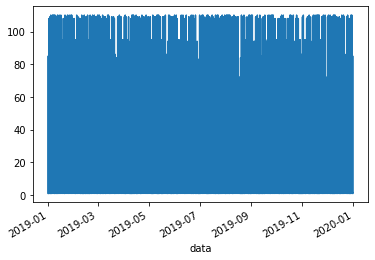

In [ ]:
# seleção das colunas
dados_analise.plot(legend = None)

In [ ]:
# teste
teste_adf_2019 = adfuller(dados_2019_analise['quantidade'])

# valor da estatistica
print('Estatística ADF: {:.4}'.format(teste_adf_2019[0]))

# p-value
print('p-value: {:.4}'.format(teste_adf_2019[1]))

Estatística ADF: -224.1
p-value: 0.0


- INSIGHTS

In [ ]:
# Média Venda por região e ano - 2019
dados_2019.groupby('regiao_pais')    .agg(vendas_2019 = pd.NamedAgg('valor_total_bruto', 'mean'))

,vendas_2019
regiao_pais,
Centro Oeste,431.801492
Nordeste,483.279636
Norte,373.204919
Sudeste,436.322231
Sul,371.363787


In [ ]:
# Média Venda por região e ano - 2020
dados_2020.groupby('regiao_pais')    .agg(vendas_2020 = pd.NamedAgg('valor_total_bruto', 'mean'))

,vendas_2020
regiao_pais,
Centro Oeste,387.780584
Nordeste,317.868895
Norte,307.663520
Sudeste,293.224749
Sul,358.024454


In [ ]:
# Média Venda por região e ano - 2021
dados_2021.groupby('regiao_pais')    .agg(vendas_2021 = pd.NamedAgg('valor_total_bruto', 'mean'))

,vendas_2021
regiao_pais,
Centro Oeste,506.608511
Nordeste,434.470397
Norte,468.278292
Sudeste,465.410252
Sul,464.604391


In [ ]:
# Média Venda por região e ano - 2022
dados_2022.groupby('regiao_pais')    .agg(vendas_2022 = pd.NamedAgg('valor_total_bruto', 'mean'))

,vendas_2022
regiao_pais,
Centro Oeste,723.186483
Nordeste,606.684836
Norte,345.672748
Sudeste,351.333911
Sul,354.021723


In [ ]:
# Estado com mais venda - 2019
n = 1
dados_2019.groupby('estado')    .agg(vendas_2019 = pd.NamedAgg('valor_total_bruto', 'sum')) \
    .sort_values(by='vendas_2019', ascending=False).head(n)

,vendas_2019
estado,
Maranhão,1721476


In [ ]:
# Estado com mais venda - 2020
n = 1
dados_2020.groupby('estado')    .agg(vendas_2020 = pd.NamedAgg('valor_total_bruto', 'sum')) \
    .sort_values(by='vendas_2020', ascending=False).head(n)

,vendas_2020
estado,
Mato Grosso,933478.76


In [ ]:
# Estado com mais venda - 2021
n = 1
dados_2021.groupby('estado')    .agg(vendas_2021 = pd.NamedAgg('valor_total_bruto', 'sum')) \
    .sort_values(by='vendas_2021', ascending=False).head(n)

,vendas_2021
estado,
Pernambuco,1298910.06


In [ ]:
# Estado com mais venda - 2022
n = 1
dados_2022.groupby('estado')    .agg(vendas_2022 = pd.NamedAgg('valor_total_bruto', 'sum')) \
    .sort_values(by='vendas_2022', ascending=False).head(n)

,vendas_2022
estado,
Ceará,4278096.78


In [ ]:
# Venda por Categoria - 2019
dados_2019.groupby('categoriaprod')    .agg(categoria_2019 = pd.NamedAgg('valor_total_bruto', 'sum')) \
    .sort_values(by='categoria_2019', ascending=False)

,categoria_2019
categoriaprod,
Bebedouros e Comedouros,7523889.0
Alimentação,4060951.0
Medicamento,3595307.0
Acessório,3163961.0
Higiene e Limpeza,1589190.0
Petisco,664411.0
Brinquedo,592996.0


In [ ]:
# Venda por Categoria - 2020
dados_2020.groupby('categoriaprod')    .agg(categoria_2020 = pd.NamedAgg('valor_total_bruto', 'sum')) \
    .sort_values(by='categoria_2020', ascending=False)

,categoria_2020
categoriaprod,
Bebedouros e Comedouros,5290306.32
Medicamento,3537472.68
Alimentação,3462374.40
Acessório,2087637.96
Higiene e Limpeza,903914.56
Petisco,659379.52
Brinquedo,392155.80


In [ ]:
# Venda por Categoria - 2021
dados_2021.groupby('categoriaprod')    .agg(categoria_2021 = pd.NamedAgg('valor_total_bruto', 'sum')) \
    .sort_values(by='categoria_2021', ascending=False)

,categoria_2021
categoriaprod,
Bebedouros e Comedouros,8732882.94
Medicamento,4540170.65
Alimentação,4218295.99
Acessório,3083630.35
Higiene e Limpeza,1306351.63
Petisco,827373.57
Brinquedo,561760.37


In [ ]:
# Venda por Categoria - 2022
dados_2022.groupby('categoriaprod')    .agg(categoria_2022 = pd.NamedAgg('valor_total_bruto', 'sum')) \
    .sort_values(by='categoria_2022', ascending=False)

,categoria_2022
categoriaprod,
Medicamento,7371275.14
Bebedouros e Comedouros,6311007.94
Alimentação,6167707.68
Acessório,1842348.38
Higiene e Limpeza,876984.68
Petisco,712504.56
Brinquedo,449110.22


In [ ]:
# Qtd Vendida por Categoria - 2019
dados_2019.groupby('categoriaprod')    .agg(qtd_categoria_2019 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='qtd_categoria_2019', ascending=False)

,qtd_categoria_2019
categoriaprod,
Acessório,48626.0
Alimentação,40163.0
Medicamento,28957.0
Petisco,28821.0
Brinquedo,27106.0
Higiene e Limpeza,27069.0
Bebedouros e Comedouros,15359.0


In [ ]:
# Qtd Vendida por Categoria- 2020
dados_2020.groupby('categoriaprod')    .agg(qtd_categoria_2020 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='qtd_categoria_2020', ascending=False)

,qtd_categoria_2020
categoriaprod,
Acessório,43981.0
Alimentação,35445.0
Medicamento,25788.0
Petisco,24285.0
Higiene e Limpeza,21428.0
Brinquedo,21292.0
Bebedouros e Comedouros,12396.0


In [ ]:
# Qtd Vendida por Categoria - 2021
dados_2021.groupby('categoriaprod')    .agg(qtd_categoria_2021 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='qtd_categoria_2021', ascending=False)

,qtd_categoria_2021
categoriaprod,
Acessório,44750.0
Alimentação,28073.0
Petisco,25637.0
Medicamento,25299.0
Higiene e Limpeza,24082.0
Brinquedo,23856.0
Bebedouros e Comedouros,12580.0


In [ ]:
# Qtd Vendida por Categoria - 2022
dados_2022.groupby('categoriaprod')    .agg(qtd_categoria_2022 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='qtd_categoria_2022', ascending=False)

,qtd_categoria_2022
categoriaprod,
Acessório,27792.0
Alimentação,26128.0
Medicamento,18512.0
Petisco,18419.0
Brinquedo,16329.0
Higiene e Limpeza,13387.0
Bebedouros e Comedouros,8859.0


In [ ]:
# Quantidade por Centro Distribuição - 2019
dados_2019.groupby('centro_distribuicao')    .agg(centro_distribuicao_2019 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='centro_distribuicao_2019', ascending=False)

,centro_distribuicao_2019
centro_distribuicao,
Rapid Pink,60384.0
Gold Beach,58109.0
Grãos Blue,35946.0
Papa Léguas,34318.0
Tree True,27344.0


In [ ]:
# Quantidade por Centro Distribuição - 2020
dados_2020.groupby('centro_distribuicao')    .agg(centro_distribuicao_2020 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='centro_distribuicao_2020', ascending=False)

,centro_distribuicao_2020
centro_distribuicao,
Rapid Pink,51005.0
Gold Beach,49041.0
Grãos Blue,30638.0
Papa Léguas,29939.0
Tree True,23992.0


In [ ]:
# Quantidade por Centro Distribuição - 2021
dados_2021.groupby('centro_distribuicao')    .agg(centro_distribuicao_2021 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='centro_distribuicao_2021', ascending=False)

,centro_distribuicao_2021
centro_distribuicao,
Rapid Pink,53188.0
Gold Beach,51017.0
Grãos Blue,29972.0
Papa Léguas,28839.0
Tree True,21261.0


In [ ]:
# Quantidade por Centro Distribuição - 2022
dados_2022.groupby('centro_distribuicao')    .agg(centro_distribuicao_2022 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='centro_distribuicao_2022', ascending=False)

,centro_distribuicao_2022
centro_distribuicao,
Gold Beach,35932.0
Rapid Pink,35663.0
Grãos Blue,21284.0
Papa Léguas,21240.0
Tree True,15495.0


In [ ]:
# Produto mais vendido - 2019
n = 5
dados_2019.groupby('produto')    .agg(qtd_2019 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='qtd_2019', ascending=False).head(n)

,qtd_2019
produto,
Shampoo vegano para cachorro e gato de camomila 250 ml,11335.0
Suplemento Alimentar Glutamina Mundo Animal Nutrisana,11217.0
Biscoito True Champion 300g,10566.0
Ração Úmida Royal Canin Lata Veterinary Cães Adultos 500g,10223.0
Ração Royal Canin Club Performance para Cães Adultos,10131.0


In [ ]:
# Produto mais vendido - 2020
n = 5
dados_2020.groupby('produto')    .agg(qtd_2020 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='qtd_2020', ascending=False).head(n)

,qtd_2020
produto,
Biscoito True Champion 300g,9438.0
"Ração Royal Canin Exigent Gatos Adultos 1,5Kg",9304.0
Vitamina E Granulado BigForce,9249.0
Shampoo vegano para cachorro e gato de camomila 250 ml,9108.0
Bandana Disney Mickey Fábrica Petti,8810.0


In [ ]:
# Produto mais vendido - 2021
n = 5
dados_2021.groupby('produto')    .agg(qtd_2021 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='qtd_2021', ascending=False).head(n)

,qtd_2021
produto,
Pote Petisco Para Cachorro Bifinho Sabor Carne 1Kg Amiguitos,9076.0
Penas Gatito,8921.0
Vitamina E Granulado BigForce,8881.0
Ração Úmida Royal Canin Lata Veterinary Cães Adultos 500g,8861.0
Suplemento Alimentar Glutamina Mundo Animal Nutrisana,8788.0


In [ ]:
# Produto mais vendido - 2022
n = 5
dados_2022.groupby('produto')    .agg(qtd_2022 = pd.NamedAgg('quantidade', 'sum')) \
    .sort_values(by='qtd_2022', ascending=False).head(n)

,qtd_2022
produto,
Biscoito True Champion 300g,7952.0
Bola Pet Vinil Big Blue,6634.0
Whiskas Petisco Temptations Anti Bola de Pelo 40g,6478.0
Suplemento Alimentar Glutamina Mundo Animal Nutrisana,6368.0
Bandana Disney Mickey Fábrica Petti,6289.0
